# Clustering

In [1]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/df_spotify.csv')

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:  17 
Entradas:  300


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


In [3]:
# selecionando as features numéricas
df_num = pd.DataFrame(df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values)

# salvando os nomes das colunas
cols = df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].columns



In [4]:
# colocando os dados na mesma escala
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_num))
scaled.columns = cols

scaled.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.86,0.819364,0.506928,0.454545,0.545212,0.0,0.038116,0.252951,0.000011,0.168483,0.903137,0.690948,0.086668,0.75
1,0.85,0.578035,0.729792,0.363636,0.706076,1.0,0.035657,0.059682,0.000000,0.975086,0.657677,0.508160,0.075697,0.75
2,0.85,0.660405,0.841801,0.909091,0.780177,0.0,0.062462,0.428185,0.000000,0.095816,0.870116,0.658797,0.161742,0.75
3,0.84,0.553468,0.789838,0.000000,0.637684,0.0,0.174966,0.074438,0.000000,0.374027,0.591635,0.902084,0.178135,0.75
4,0.84,0.380058,0.876443,1.000000,0.787439,1.0,0.070577,0.243728,0.000000,0.325236,0.719318,0.677181,0.150162,0.75


Agora que os dados estão prontos, vamos descobrir quantos clusters precisaremos.

A título de curiosidade, vamos plotar o Elbow Method para os dados balanceados e não balanceados, para que possamos ver a diferença.

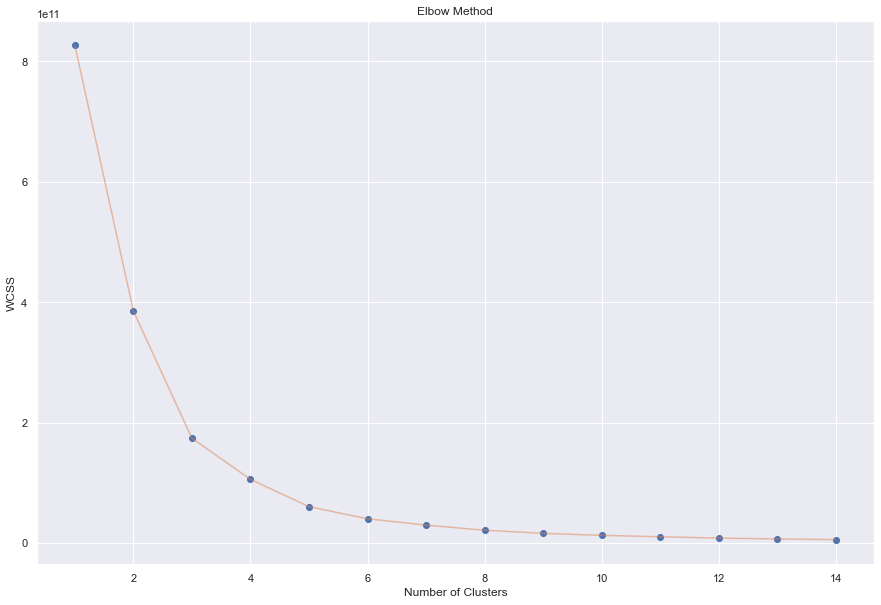

In [5]:
# dados originais
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(df_num)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)

# plotando o Elbow Method  
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

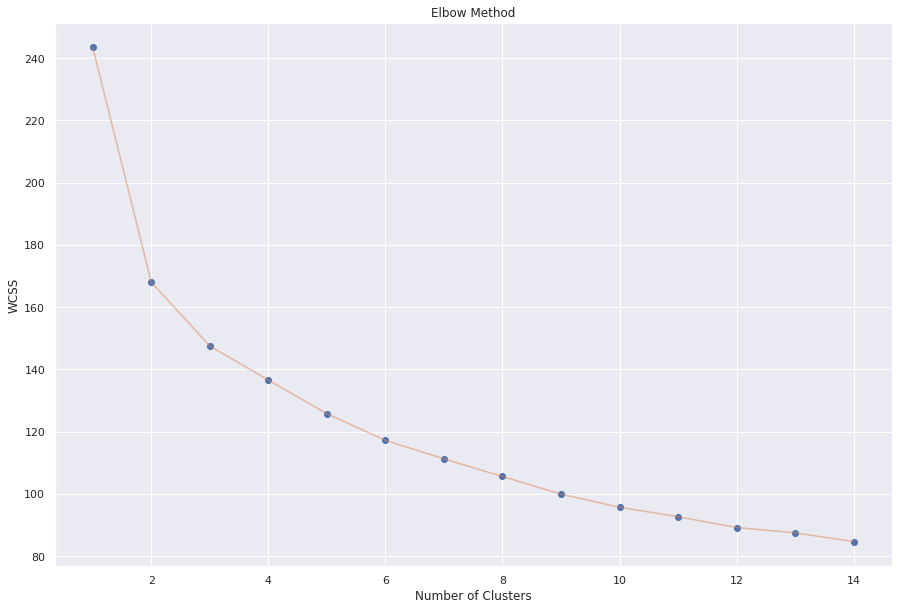

In [ ]:
# Dados Padronizados
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(scaled)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)
  
# plotando o Elbow Method  
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [6]:
# verificar os resultados
print('Lista Com Erros: ', wcss)

Lista Com Erros:  [826385212646.9828, 385089468334.3796, 173871337611.2555, 105580091095.22575, 60242813599.75106, 40079887785.704865, 29618345328.27532, 21111549227.555214, 15891639460.994263, 12560578149.351511, 10243205848.009718, 8048510066.14454, 6618398183.674187, 5561752927.590761]


In [7]:
# diferença entre os elementos
dif = np.diff(wcss)
print('Diferença Entre os Elementos: ', dif)

Diferença Entre os Elementos:  [-4.41295744e+11 -2.11218131e+11 -6.82912465e+10 -4.53372775e+10
 -2.01629258e+10 -1.04615425e+10 -8.50679610e+09 -5.21990977e+09
 -3.33106131e+09 -2.31737230e+09 -2.19469578e+09 -1.43011188e+09
 -1.05664526e+09]


Aparentemente, 6 é um bom número de Clusters.

Agora vamos instanciar o modelo que vamos usar, definindo o número correto de clusters, e vamos ver como nossos dados foram separados.

In [8]:
# instanciando o modelo
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

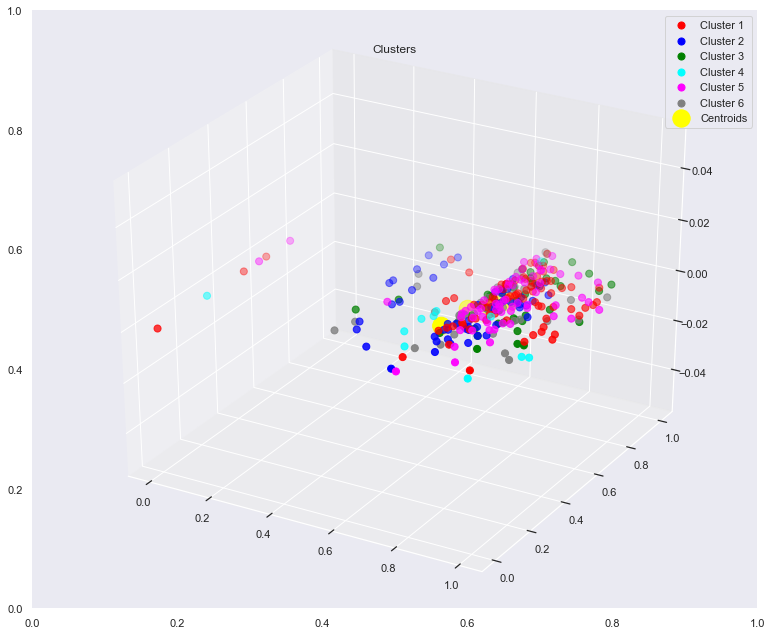

In [9]:
# visualizando os clusters
fig, ax = plt.subplots(figsize=(13,11))
scaled = scaler.fit_transform(df_num)
# definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')
# plotando os clusters
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

## [Visualizar Os Clusters](https://plotly.com/~rafaelnduarte/1/)

In [10]:
# visualizando as previsões
y_kmeans

array([0, 1, 0, 5, 4, 0, 4, 5, 2, 2, 1, 0, 5, 4, 4, 4, 2, 0, 1, 1, 4, 4,
       4, 1, 0, 2, 1, 1, 2, 2, 1, 1, 4, 4, 0, 1, 2, 4, 4, 4, 1, 0, 1, 0,
       2, 1, 2, 4, 0, 1, 1, 2, 4, 4, 4, 2, 0, 2, 0, 0, 0, 0, 1, 5, 1, 5,
       0, 2, 5, 5, 2, 5, 3, 4, 3, 1, 0, 2, 0, 0, 5, 4, 4, 0, 1, 1, 4, 4,
       4, 0, 0, 2, 0, 1, 0, 0, 0, 1, 5, 0, 0, 4, 0, 4, 2, 1, 4, 2, 3, 1,
       1, 0, 4, 2, 0, 1, 0, 4, 5, 5, 4, 2, 5, 0, 4, 1, 4, 5, 5, 4, 1, 5,
       4, 2, 4, 0, 0, 5, 5, 0, 5, 0, 0, 0, 0, 2, 1, 0, 0, 0, 5, 2, 5, 5,
       4, 0, 2, 1, 2, 1, 5, 0, 2, 1, 1, 2, 1, 4, 0, 4, 5, 0, 1, 2, 4, 1,
       1, 2, 1, 2, 5, 1, 4, 4, 2, 5, 4, 0, 4, 0, 0, 1, 4, 4, 0, 2, 0, 1,
       2, 1, 4, 0, 0, 2, 4, 0, 3, 2, 1, 2, 1, 5, 1, 1, 0, 1, 4, 5, 4, 1,
       1, 0, 0, 0, 0, 5, 5, 1, 0, 5, 3, 4, 5, 2, 4, 1, 2, 0, 0, 4, 0, 4,
       2, 4, 5, 4, 2, 5, 0, 5, 0, 4, 4, 1, 1, 0, 5, 0, 5, 4, 0, 1, 4, 2,
       5, 0, 5, 4, 5, 5, 4, 3, 0, 2, 2, 0, 0, 2, 4, 0, 2, 5, 0, 3, 5, 0,
       0, 0, 0, 4, 5, 3, 3, 4, 0, 5, 5, 3, 3, 4])

In [11]:
# convertendo as previsões para um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['cluster']

# previsões como um df
print(kmeans.shape)
kmeans.head()

(300, 1)


,cluster
0,0
1,1
2,0
3,5
4,4


In [12]:
# concatenando os clusters 
df = pd.concat([df, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4,0
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4,1
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4,0
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4,5
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4,4


In [13]:
# checando valores nulos
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

cluster             0.0
time_signature      0.0
track_name          0.0
track_id            0.0
popularity          0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
artist_name         0.0
dtype: float64

In [14]:
# média de popularidade por cluster
df.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
2    76.111111
0    73.975000
4    73.421875
5    72.434783
1    67.888889
3    67.090909
Name: popularity, dtype: float64

In [15]:
# conferindo o número de músicas por cluster
df['cluster'].value_counts()

0    80
4    64
1    54
5    46
2    45
3    11
Name: cluster, dtype: int64

In [18]:
# checando as músicas no cluster
df.loc[df['cluster'] == 3][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
72,MC Kevin o Chris,Ela É do Tipo,2x8TNY9KwNvD19gVGs4WOP,76,0.632,0.398,6,-6.615,1,0.3730,0.945,0.000000,0.2280,0.6330,90.695,204931,4,3
74,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.505,0.340,4,-9.005,1,0.0438,0.576,0.000000,0.2100,0.0916,101.993,206459,4,3
108,Lewis Capaldi,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,96,0.501,0.405,1,-5.679,1,0.0319,0.751,0.000000,0.1050,0.4460,109.891,182161,4,3
206,MC Caverinha,Flash,3UEm2avDtIIaT3UvuvsxES,70,0.913,0.366,7,-14.341,1,0.3290,0.731,0.000023,0.1480,0.1230,125.035,155937,4,3
230,ANAVITÓRIA,relicário,1fZgxJgmmOl8zCyHgcKAWE,65,0.431,0.260,0,-12.001,1,0.0382,0.840,0.000150,0.1040,0.1570,159.567,245539,3,3
271,ANAVITÓRIA,pra você guardei o amor,1TNXJFbHrXe3gVch3HxD7p,62,0.579,0.221,2,-13.962,1,0.0325,0.928,0.002670,0.1090,0.3140,77.113,228785,4,3
283,Billie Eilish,when the party's over,43zdsphuZLzwA9k4DJhU0I,90,0.367,0.111,4,-14.084,1,0.0972,0.978,0.000040,0.0897,0.1980,82.642,196077,4,3
291,ANAVITÓRIA,por onde andei,22AAo9zdJD18OX6tC1VR95,61,0.602,0.474,0,-11.731,1,0.0647,0.925,0.011100,0.1940,0.4330,168.035,208573,4,3
292,Maroon 5,Happy Christmas (War Is Over) - Bonus Track,1nEN1kpLEZ0sJWKRUQT03k,0,0.441,0.157,2,-10.792,1,0.0307,0.936,0.000000,0.1070,0.1860,143.241,206707,3,3
297,ANAVITÓRIA,as coisas tão mais lindas,2qvSChyYgm8ybTncALA4pD,60,0.490,0.290,0,-13.905,1,0.0312,0.844,0.000247,0.1560,0.1840,81.724,218275,4,3
